# **Predicting House Prices Using Linear Regression**

# Importing the data and understanding its composition

In [1]:
# importing required libraires for analysing and visualising the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Estate_data = pd.read_csv('Real Estate.csv')
Estate_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


As shown above, the dataset contains several columns related to property details:

***price***: The sale price of the property (target variable).
***area***: The area of the property.
***bedrooms***: Number of bedrooms.
***bathrooms***: Number of bathrooms.
***storie***s: Number of stories.
***mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea:*** Binary categorical variables (e.g., yes/no).
***parking***: Number of parking spaces.
***furnishingstatus***: Categorical variable indicating furnishing type. *italicised text*

In [3]:
Estate_data.shape

(545, 13)

# Data Cleaning

In [4]:
# Checking Null values
Estate_data.isnull().sum()*100/Estate_data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

*This data seems to be squaky clean as there are not null values or duplicates*

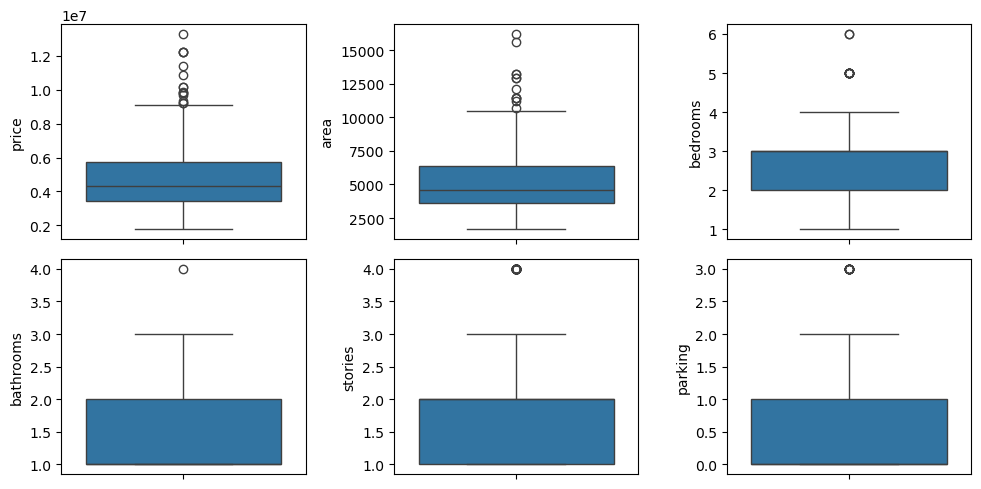

In [5]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(Estate_data['price'], ax = axs[0,0])
plt2 = sns.boxplot(Estate_data['area'], ax = axs[0,1])
plt3 = sns.boxplot(Estate_data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(Estate_data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(Estate_data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(Estate_data['parking'], ax = axs[1,2])

plt.tight_layout()

*As shown above, two of the features have considerable outliers; price and area. Since there is sufficient data, those outliers can be dropped so as not to unduly affect the outcome of the model*

*After treating the outliers, there seems to less outliers in the price and area features as indicated before*

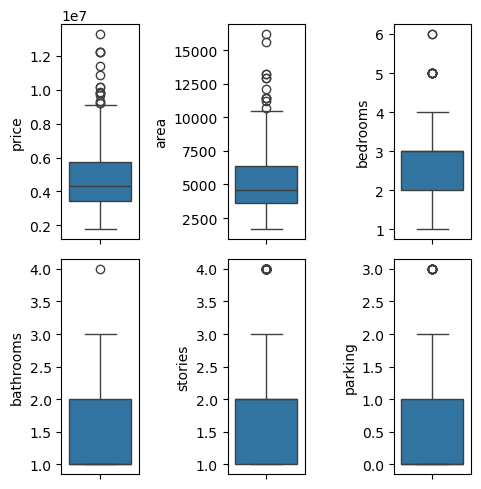

In [6]:
# After the outliers treatment, a revisualisation
fig, axs = plt.subplots(2,3, figsize = (5,5))
plt1 = sns.boxplot(Estate_data['price'], ax = axs[0,0])
plt2 = sns.boxplot(Estate_data['area'], ax = axs[0,1])
plt3 = sns.boxplot(Estate_data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(Estate_data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(Estate_data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(Estate_data['parking'], ax = axs[1,2])

plt.tight_layout()

# Data Preparation for model building: Encode categorical variables into numeric form

In [7]:
# Identify binary and non-binary categorical variables # binary columns have a yes or no string values
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
Estate_data[binary_columns] = Estate_data[binary_columns].applymap(lambda x: 1 if x.lower() == 'yes' else 0)
non_binary_column = ['furnishingstatus'] # This have other definition and values different from binary columns

C:\Users\ayari\AppData\Local\Temp\ipykernel_13264\3657288439.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Estate_data[binary_columns] = Estate_data[binary_columns].applymap(lambda x: 1 if x.lower() == 'yes' else 0)


In [8]:
# # Step 2: Encode non-binary categorical column using one-hot encoding
non_binary_column = ['furnishingstatus']
data_encoded = pd.get_dummies(Estate_data, columns=non_binary_column, drop_first=True)
# Check the resulting encoded dataset
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [9]:
# In order to fit a regression line, numerical values not string or bolean is needed
# Thus, it is necessary to convert boolean values to numerical values or intergers
data_encoded['furnishingstatus_semi-furnished'] = data_encoded['furnishingstatus_semi-furnished'].astype(int)
data_encoded['furnishingstatus_unfurnished'] = data_encoded['furnishingstatus_unfurnished'].astype(int)

data_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [10]:
# Step 3: Rename the resulting furnishing status columns for clarity
data_encoded = data_encoded.rename(columns={
    'furnishingstatus_semi-furnished': 'semi_furnished',
    'furnishingstatus_unfurnished': 'unfurnished'
})

data_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi_furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [11]:
data_encoded = data_encoded.astype(int)
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi_furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [12]:
# Now that the data encoding is donw, I can concatenate the cleaned Estate_data with the data_encoded
Estate_data = pd.concat([Estate_data, data_encoded], axis=1)
Estate_data.head() # Inspect the data to make sure the encoding and concatenation too effect as shown below

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi_furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,...,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,...,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,...,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,...,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,...,2,1,1,1,0,1,2,0,0,0


# Splitting the data into training and testing set

In [13]:
# Importing the linear regression and the train_test_split models from scikit learn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data_encoded.drop(columns=['price'])  # Maintain all other features of the dataset except price column as the target feature
y = data_encoded['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train the model with 0.8 of the dataset and test it with 0.2 of the data


# Buiding a linear regression model based on the training data

In [14]:
# Build and fit the model to the train dataset
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Carrying out Predictions based on the model

In [16]:
# Create a comparison DataFrame for predicted vs actual prices
y_pred = model.predict(X_test)
Predicted_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
Predicted_df.reset_index(drop=True, inplace=True)
Predicted_df.head()

,Actual Price,Predicted Price
0,4060000,5.164654e+06
1,6650000,7.224722e+06
2,3710000,3.109863e+06
3,6440000,4.612075e+06
4,2800000,3.294646e+06


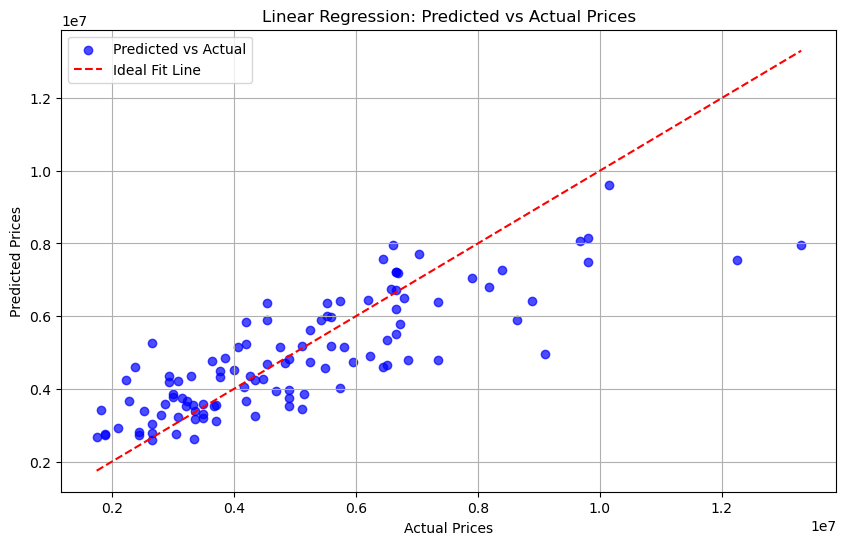

In [17]:
# Scatter plot showing the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit Line')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

# Evaluating the Model base on the R-Squared method

In [18]:
# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2


0.6529242642153184

R-squared (R²): 0.653, indicating that approximately **65.3%** of the variance in the target variable (price) is explained by the model.